In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

sns.set()
%matplotlib inline

# Normalization

In [61]:
woman = (1.50, 65)

# man 1.90m and 80kg
man = (1.90, 80)

# unknown gender 1.80m and 70kg
x = (1.80, 70)

def euclidean(pers1, pers2):
    h1, w1 = pers1
    h2, w2 = pers2
    return ((h2-h1)**2 + (w2-w1)**2)**(0.5)


print("distance to woman:", euclidean(x, woman))
print("distance to man:", euclidean(x, man))

distance to woman: 5.008991914547277
distance to man: 10.000499987500625


In [62]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

x = [[1.50, 65], [1.90, 80], [1.80, 70], [1.4, 50], [2, 100]] 
# x[0]=woman,  x[1]= man,  x[2]= unknown gender,  x[3]= min,  x[4] = max    

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)          # Fit to data, then transform it

print("")
print("normalized distance to woman:", euclidean(x_scaled[2], x_scaled[0] ))
print("normalized distance to man:", euclidean(x_scaled[2], x_scaled[1]))


normalized distance to woman: 0.5099019513592785
normalized distance to man: 0.26034165586355473


# KNN example

In [63]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [64]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [65]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [66]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [67]:
fruits.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [68]:
print(fruits.groupby('fruit_label').size()) 

fruit_label
1    19
2     5
3    19
4    16
dtype: int64


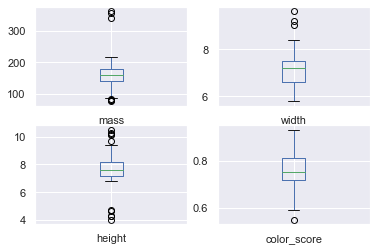

In [69]:
# box and whisker plots
fruits.iloc[:, 3:7].plot(kind='box', subplots=True, layout=(2,2))
plt.show()

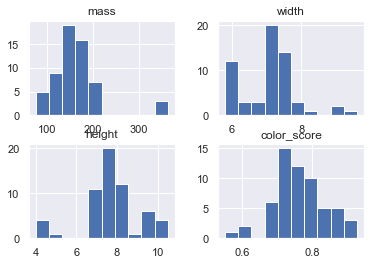

In [70]:
# histograms
fruits.iloc[:, 3:7].hist()
plt.show()

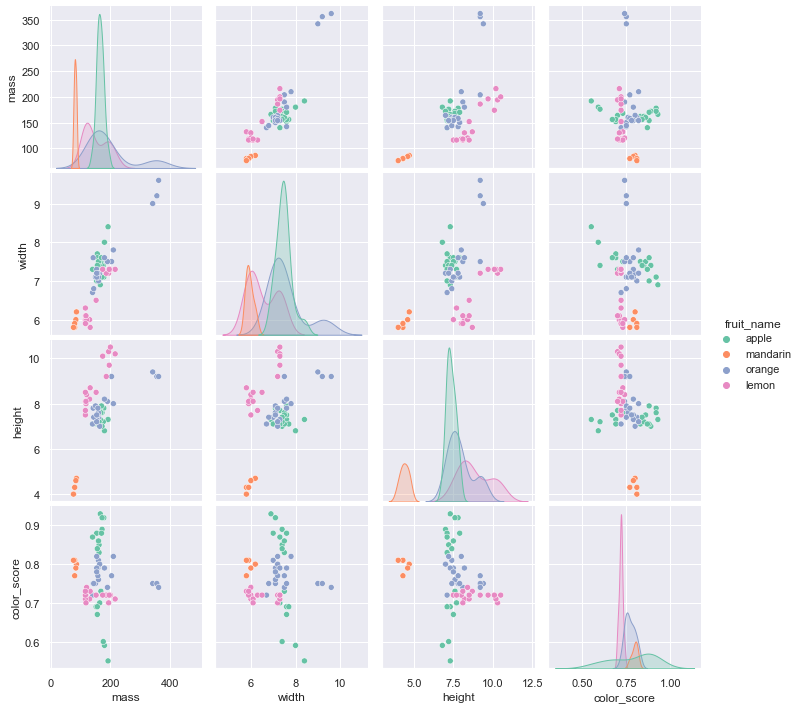

In [71]:
sns.pairplot(fruits, kind="scatter", hue="fruit_name",vars=["mass", "width", "height", "color_score"], palette="Set2")
plt.show() 
# palette: Set of colors for mapping the hue variable

In [72]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']  # 1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'

print(X.shape)
print(y.shape)

(59, 3)
(59,)


In [73]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
print(X_train[:5])

    mass  width  height
42   154    7.2     7.2
48   174    7.3    10.1
7     76    5.8     4.0
14   152    7.6     7.3
32   164    7.2     7.0


In [75]:
print(y_train[:5])

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64


In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [77]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Estimate the accuracy of the classifier on future data, using the test data

In [78]:
knn.score(X_train, y_train)

0.7954545454545454

In [79]:
knn.score(X_test, y_test)

0.5333333333333333

# Use the trained k-NN classifier model to classify new and previously unseen objects

In [80]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm

fruit_prediction = knn.predict([[20, 4.3, 5.5]])
fruit_prediction[0]     # 1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'

2

In [81]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm

fruit_prediction = knn.predict([[100, 6.3, 8.5]])
fruit_prediction[0]

4

# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter

In [82]:
X_train.shape

(44, 3)

([<matplotlib.axis.XTick at 0x26001f871f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

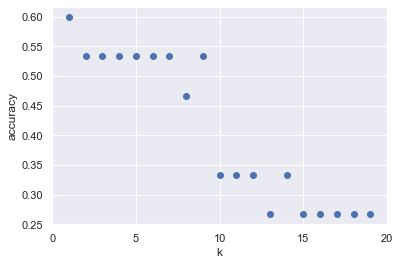

In [83]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# How sensitive is k-NN classification accuracy to the train/test split proportion?


Text(0, 0.5, 'accuracy')

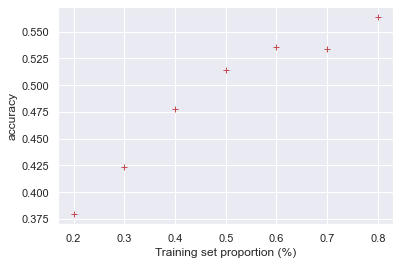

In [84]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'r+')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')

# Exercise - KNN on the Iris dataset

In [85]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [87]:
X = iris.drop("species", axis=1)

In [88]:
X.shape

(150, 4)

In [89]:
y = iris['species']

In [90]:
y.shape

(150,)

In [91]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [92]:
Xtest.shape

(30, 4)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [94]:
print("KNN train score:",knn.score(Xtrain, ytrain))
print("KNN test score:",knn.score(Xtest, ytest))

KNN train score: 0.975
KNN test score: 0.9333333333333333
